### EDA

#### Temperaturas diurnas

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from colores import colores

In [25]:
# todos los datos
df = pd.read_csv("csv/ts_diario.csv", parse_dates=["fecha"],
                   dtype={"especie": "string",
                          "LST_Day": "float64",
                          "LST_Night": "float64",
                          "LST": "float64",
                          "mes": "int"
                         })
df.head(10)

,fecha,especie,LST_Day,LST_Night,LST,mes
0,2020-01-01,estepa,35.433453,12.923966,24.178709,1
1,2020-01-01,pino,33.666374,14.703904,24.185139,1
2,2020-01-02,estepa,36.195872,12.885076,24.540474,1
3,2020-01-02,pino,31.342840,13.202792,22.272816,1
4,2020-01-03,estepa,35.245773,12.973098,24.109435,1
5,2020-01-03,pino,31.284172,13.577900,22.431036,1
6,2020-01-04,estepa,38.821326,12.445712,25.633519,1
7,2020-01-04,pino,31.450303,12.293340,21.871821,1
8,2020-01-05,pino,17.944593,7.932499,12.938546,1
9,2020-01-07,estepa,25.590980,4.402563,14.996771,1


In [26]:
# Temperaturas diurnas
df_d = pd.read_csv("csv/ts_d_diario.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,35.433453,33.666374,1,1.767079
1,2020-01-02,36.195872,31.342840,1,4.853032
2,2020-01-03,35.245773,31.284172,1,3.961601
3,2020-01-04,38.821326,31.450303,1,7.371023
4,2020-01-05,NaN,17.944593,1,NaN
5,2020-01-06,NaN,NaN,1,NaN
6,2020-01-07,25.590980,19.523039,1,6.067942
7,2020-01-08,NaN,NaN,1,NaN
8,2020-01-09,NaN,NaN,1,NaN
9,2020-01-10,27.450967,22.472114,1,4.978853


### Exploración de temperaturas por tipo de cobertura

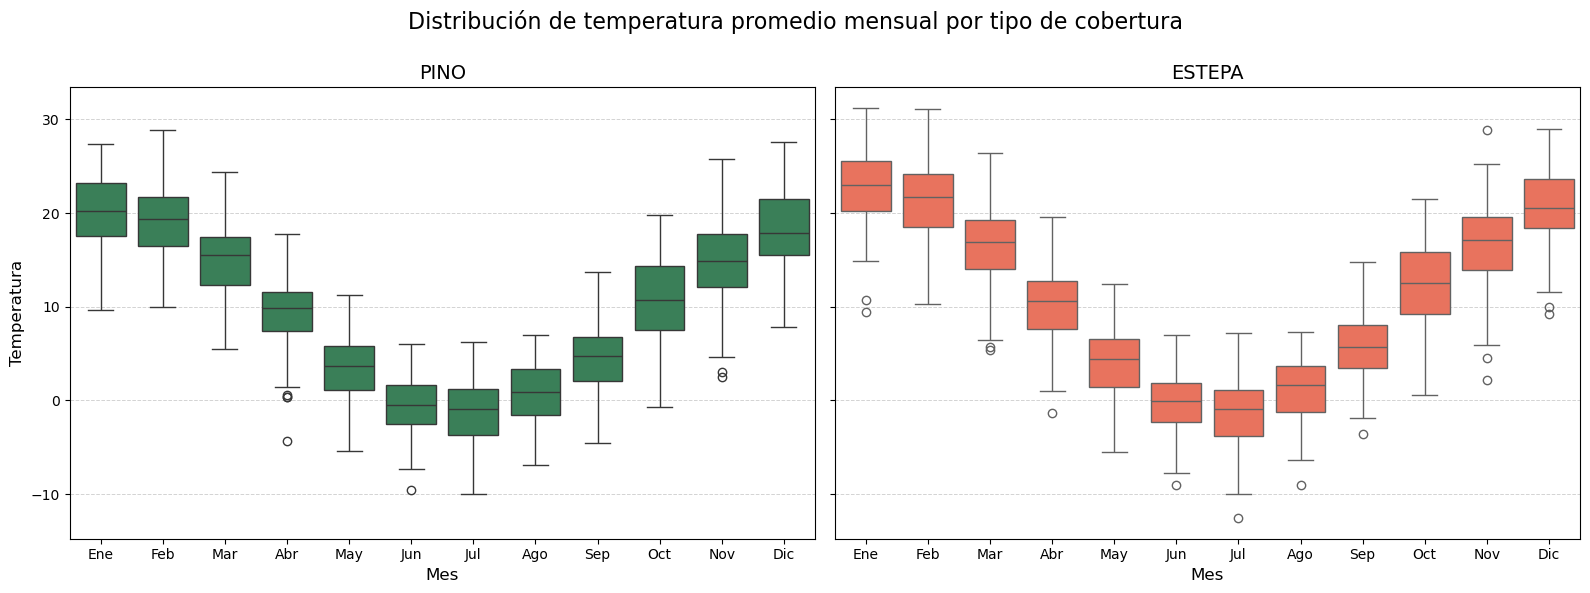

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Distribución de temperatura promedio mensual por tipo de cobertura', fontsize=16)

# Boxplot para temperaturas de pino
sns.boxplot(
    data=df[df['especie']=='pino'],
    x='mes',
    y='LST',
    ax=axes[0],
    color=colores['pino']
)
axes[0].set_title('PINO', fontsize=14)
axes[0].set_ylabel('Temperatura', fontsize=12)

# Boxplot para temperaturas de estepa
sns.boxplot(
    data=df[df['especie']=='estepa'],
    x='mes',
    y='LST',
    ax=axes[1],
    color=colores['estepa']
)
axes[1].set_title('ESTEPA', fontsize=14)
axes[1].set_ylabel('', fontsize=12)

# Ajustar etiquetas de los ejes X
for ax in axes:
    ax.set_xticks(range(0, 12))
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_xticklabels([
        'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
        'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
    ], fontsize=10),
    ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

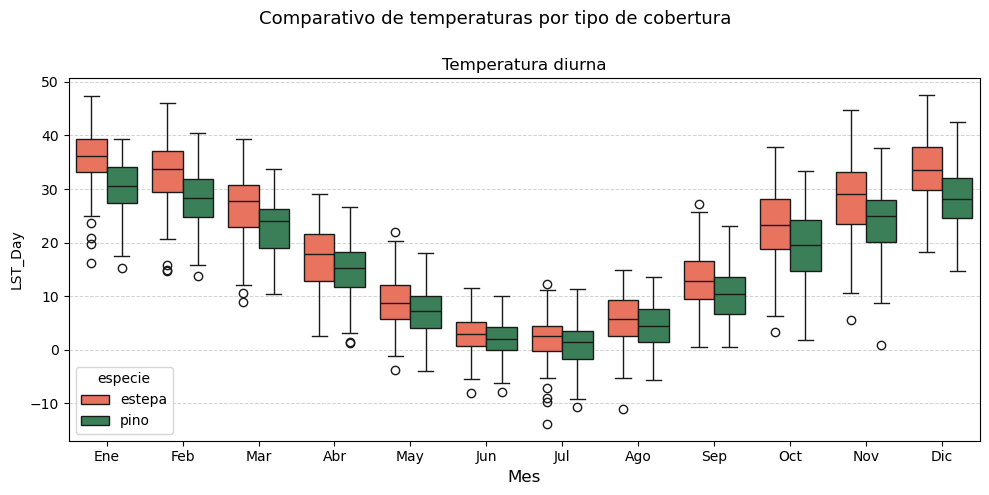

In [29]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
fig.suptitle('Comparativo de temperaturas por tipo de cobertura', fontsize=13)

sns.boxplot(
    data=df,
    x='mes',
    y='LST_Day',
    hue='especie',
    palette=colores,
    ax=axes
)
axes.set_title('Temperatura diurna', fontsize=12)

axes.set_xlabel('Mes', fontsize=12)
axes.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)
axes.set_xticks(ticks=range(0, 12), fontsize=10,
                       labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Deltas de temperatura diurna

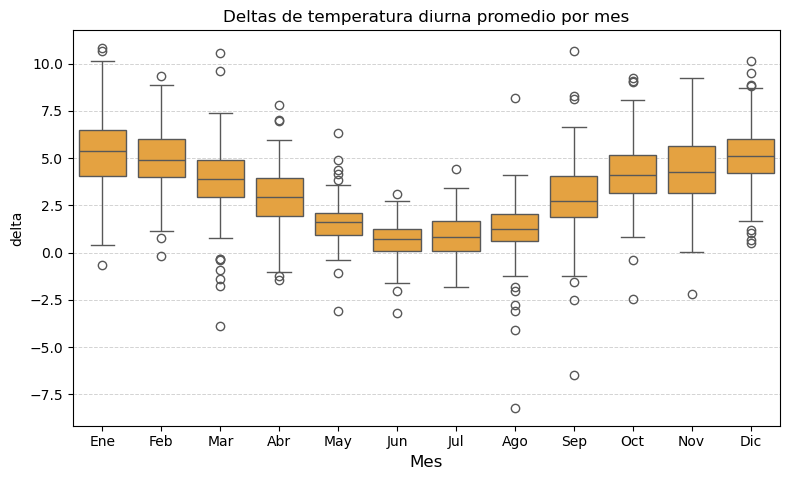

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.boxplot(
    data=df_d,
    x='mes',
    y='delta',
    color=colores['dia'],
    ax=axes
)
axes.set_title('Deltas de temperatura diurna promedio por mes', fontsize=12)

axes.set_xlabel('Mes', fontsize=12)
axes.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)
axes.set_xticks(ticks=range(0, 12), fontsize=10,
                       labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

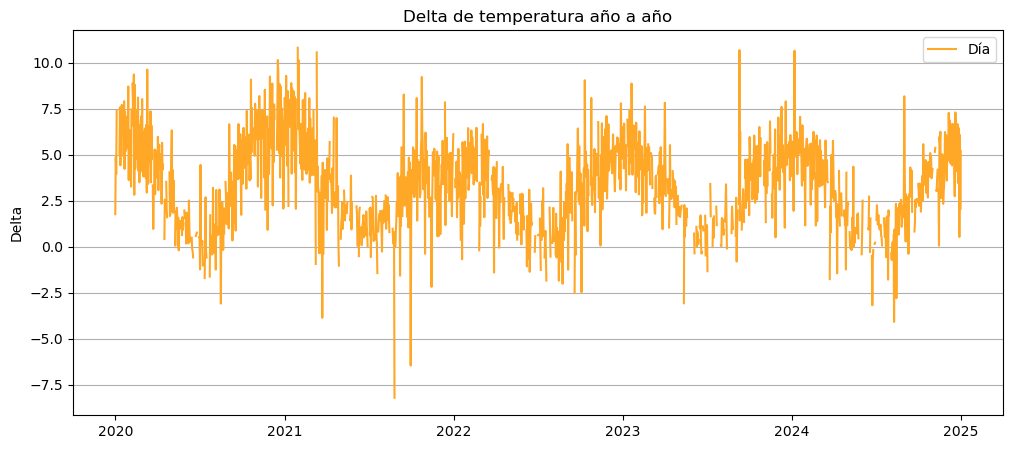

In [31]:
plt.figure(figsize=(12, 5))

plt.plot(df_d['fecha'], df_d['delta'], label='Día', color=colores['dia'])
plt.title('Delta de temperatura año a año')
plt.ylabel('Delta')
plt.grid(axis='y')
plt.legend()
plt.show()

### Análisis de faltantes

In [32]:
import missingno as msno

In [33]:
# Cuál es el porcentaje de faltantes?
df_d[['estepa','pino']].isna().mean()*100

estepa    15.161467
pino      15.873016
dtype: float64

<Axes: >

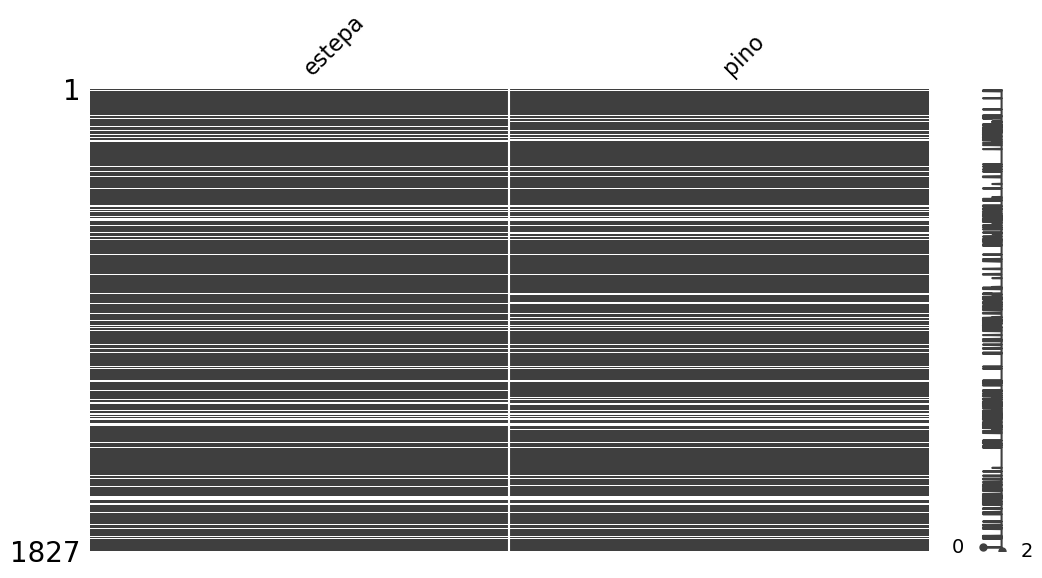

In [34]:
msno.matrix(df_d[['estepa', 'pino']], figsize=(12,6))

Hay un 15 % de faltantes en las temperaturas en ambos tipos de cobertura. Para poder trabajar con estas series de tiempo es necesario hacer algún tipo de imputación.